# A statistical analysis of Airbnb listings in Seattle: <br> <font size="4">Looking to dig deeper into data </font>

##  1- Business Understanding:
This notebook tries to analyze the "Seattle AirBnb Open Data"



These are the five main  questions for our analysis:
<font color='#FF8C00'>
    
Q1. What type of properties has the highest prices?<br>
Q2. Does "host_response_time" impact on the location's number of reviewers?<br>
Q3. Which neighbourhoods got the most reviews?<br>
Q4. What factors have the most impact on price?<br>
Q5. How well can we predict the price and the number of bedrooms?<br>

</font>

## 2- Data Understanding


Seattle dataset: * Listings, including full descriptions.

For this analysis, we are focusing the Listings data because that is needed to address the our questions.



###  Libraries needed

In [90]:
# libraries needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import re



In [91]:
# listings.csv Seattle Airbnb dataset
df = pd.read_csv('listings.csv')

# The dataset shape
print(df.shape,'\n')

df.head(5)

(4335, 74) 



,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,2.020100e+13,25/10/2020,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...",Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,...,10.0,10.0,10.0,STR-OPLI-19-002837,f,2,2,0,0,0.22
1,9419,https://www.airbnb.com/rooms/9419,2.020100e+13,25/10/2020,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,...,10.0,10.0,10.0,str-opli-19-003039,f,8,0,8,0,1.19
2,9531,https://www.airbnb.com/rooms/9531,2.020100e+13,25/10/2020,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.37
3,9534,https://www.airbnb.com/rooms/9534,2.020100e+13,25/10/2020,The Coolest Tangerine Dream MIL!,Welcome to my delicious Tangerine Dream! A co...,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.50
4,9596,https://www.airbnb.com/rooms/9596,2.020100e+13,25/10/2020,"the down home , spacious, central and fab!","We are in a great neighborhood, quiet, full of...","if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,https://www.airbnb.com/users/show/14942,...,9.0,10.0,9.0,STR-OPLI-19-002622,f,2,2,0,0,0.85


In [92]:
#The dataset columns
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

## 3- Data Preparation

In [93]:
# Remove $ from the price and convert it into float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['price'].sort_values(ascending=False)

1806    3503.0
1676    1650.0
264     1500.0
1183    1304.0
973     1079.0
         ...  
3546      16.0
3547      16.0
3549      16.0
3550      16.0
3552      16.0
Name: price, Length: 4335, dtype: float64

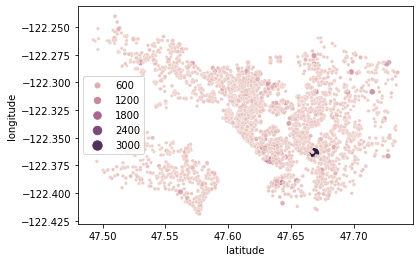

In [94]:
# Show the places based on Logitude and Latitude and price
sns.scatterplot(data=df, x="latitude", y="longitude",hue=df['price'].tolist(),size=df['price'].tolist(), sizes=(10, 100));
plt.savefig('im1.png', dpi=300, bbox_inches= 'tight' )

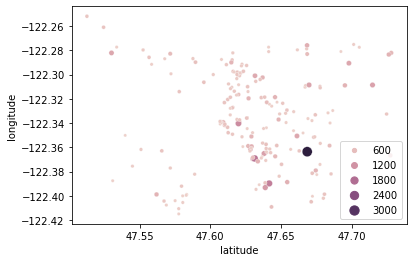

In [95]:
# Show the places that their price is greater that $300
df1 = df[df['price'] > 300]
sns.scatterplot(data=df1[['latitude','longitude','price']], x="latitude", y="longitude",hue=df1.price.tolist(),size=df1.price.tolist(), sizes=(10, 100)); 
plt.savefig('im2.png', dpi=300, bbox_inches= 'tight' )

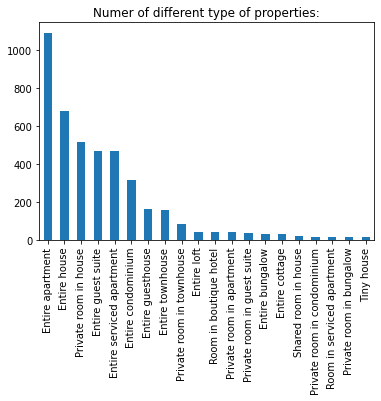

In [96]:
# Number of different type of properties
status_vals = df.property_type.value_counts()
(status_vals[:20]).plot(kind="bar");
plt.title("Numer of different type of properties:");
plt.savefig('im3.png', dpi=300, bbox_inches= 'tight' )

# <font size="4"> <font color = '#FF8C00'> Q1. What type of properties has the highest prices? </font></font>



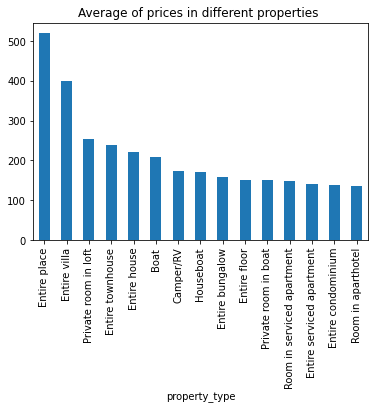

In [97]:
# Average price of different type of properties
status_vals2 = df.groupby(['property_type']).mean()['price'].sort_values(ascending=False)
(status_vals2[:15]).plot(kind="bar");
plt.title("Average of prices in different properties ");
plt.savefig('im4.png', dpi=300, bbox_inches= 'tight' )

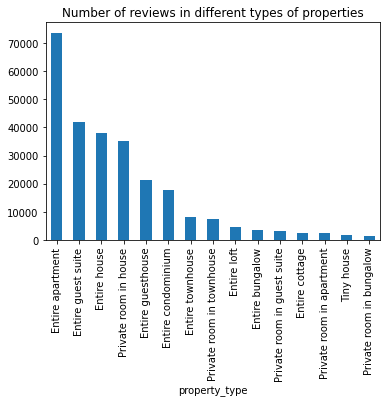

In [98]:
# Number of reviews in different types of properties
status_vals2 = df.groupby(['property_type']).sum()['number_of_reviews'].sort_values(ascending=False)
(status_vals2[:15]).plot(kind="bar");
plt.title("Number of reviews in different types of properties");
plt.savefig('im5.png', dpi=300, bbox_inches= 'tight' )

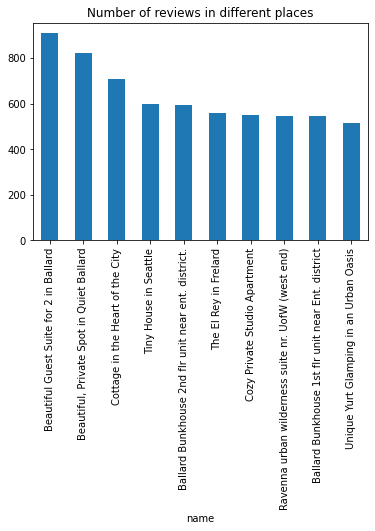

In [99]:
# Number of reviews in different places
status_vals2 = df.groupby(['name']).sum()['number_of_reviews'].sort_values(ascending=False)
(status_vals2[:10]).plot(kind="bar");
plt.title('Number of reviews in different places');
plt.savefig('im6.png', dpi=300, bbox_inches= 'tight' )

# <font size="4"> <font color = '#FF8C00'> Q2. Does "host_response_time" impact on the location's number of reviewers? </font></font>

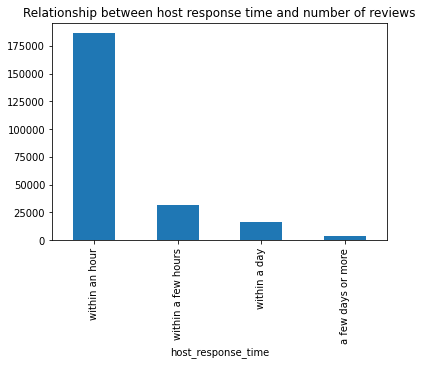

In [100]:
# Relationship bwteen host respone time and number of reviews
status_vals3 = df.groupby(['host_response_time']).sum()['number_of_reviews'].sort_values(ascending=False)
(status_vals3[:10]).plot(kind="bar");
plt.title("Relationship between host response time and number of reviews");
plt.savefig('im7.png', dpi=300, bbox_inches= 'tight' )

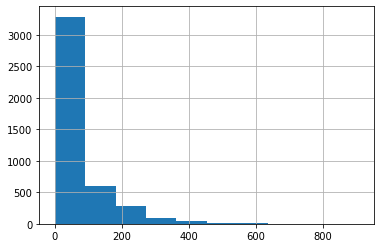

In [101]:
# Histogram of number of reviews
status_vals = df['number_of_reviews'].hist()
plt.savefig('im8.png', dpi=300, bbox_inches= 'tight' )


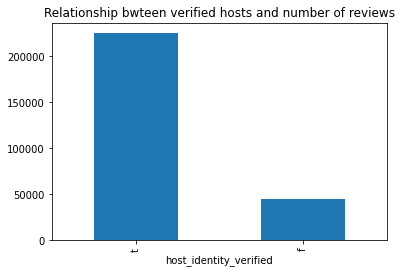

In [102]:
# Relationship bwteen verified hosts and number of reviews
status_vals3 = df.groupby(['host_identity_verified']).sum()['number_of_reviews'].sort_values(ascending=False)
(status_vals3[:20]).plot(kind="bar");
plt.title("Relationship bwteen verified hosts and number of reviews");
plt.savefig('im9.png', dpi=300, bbox_inches= 'tight' )



# <font size="4"> <font color = '#FFA500'> Q3. Which neighbourhoods got the most reviews? </font></font>

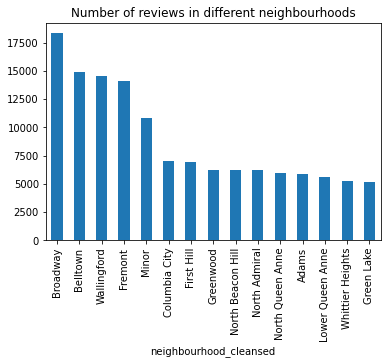

In [103]:

status_vals3 = df.groupby(['neighbourhood_cleansed']).sum()['number_of_reviews'].sort_values(ascending=False)
(status_vals3[:15]).plot(kind="bar");
plt.title("Number of reviews in different neighbourhoods");
plt.savefig('im11.png', dpi=300, bbox_inches= 'tight' )


# <font size="4"> <font color = '#FF8C00'> Q4. What factors have the most impact on price? </font></font>

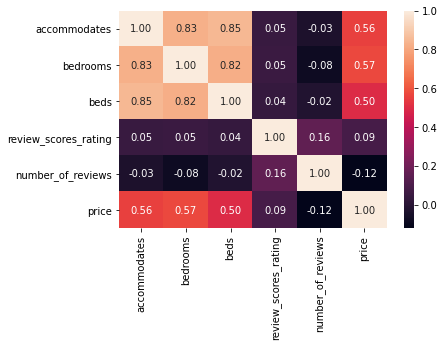

In [104]:
# Impact of different factors on price
cols = ['accommodates','bedrooms','beds','review_scores_rating', 'number_of_reviews', 'price']

sns.heatmap(df[cols].corr(), annot=True, fmt=".2f");
plt.savefig('im12.png', dpi=300, bbox_inches= 'tight' )

In [105]:
# Fining how many places have Wifi?

tags = df['amenities'].apply(lambda col: re.findall(r'"(.*?)"', col)).apply(pd.Series)
tags = tags.rename(columns = lambda x : 'seb' + str(x))
print(tags.shape)
#tags.head(10)


(4335, 60)


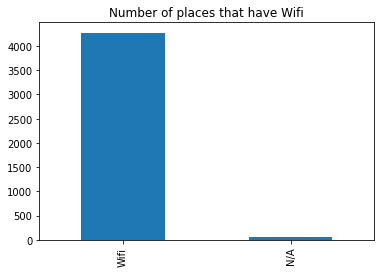

In [106]:
facility = "Wifi"
df['facilities'] = df['amenities'].apply(lambda col: tuple(re.findall(facility, col)))
status_vals = df['facilities'].value_counts()
#status_vals
Y = re.findall(r'"(.*?)"', str(status_vals.axes[0][0]))
status_vals[facility] = status_vals.values[0]
Y = re.findall(r'"(.*?)"', str(status_vals.axes[0][1]))
status_vals['N/A'] = status_vals.values[1]

status_vals[[facility,'N/A']].plot(kind="bar");
plt.title("Number of places that have Wifi");
plt.savefig('im13.png', dpi=300, bbox_inches= 'tight' )

## 4- Data Modeling:


# <font size="4"> <font color = '#FF8C00'> Q5. How well can we predict the price and the number of bedrooms? </font></font>

In [107]:
## Prices prediction

X = df[['accommodates', 'bedrooms', 'beds', 'room_type','neighbourhood_cleansed',
            'host_is_superhost' ]]

y = df['price']

num_vars= X.select_dtypes(include=['int','float']).copy().columns 
cat_vars = X.select_dtypes(include=['object']).copy().columns

# Filling missing value with mean of column
for col in num_vars:

    X[col].fillna((X[col].mean()), inplace=True)

# Filling Nan value with mode of column # Filling missing value with mean of column
for var in  cat_vars:

    X[var].fillna((X[var].mode()), inplace=True)
    X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)


# Create train and test data sets

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = .30, random_state=42) 


# Model creation based on Linear Regression
lm_model1 = LinearRegression(normalize=True) # Instantiate
lm_model1.fit(X_train1, y_train1) #Fit



C:\Users\sabal\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


LinearRegression(normalize=True)

In [108]:
## Number of bedrooms prediction

# Drop Nan values 
df_wNa = df.dropna(subset=['bedrooms'], axis=0)

X = df_wNa[['accommodates', 'price', 'room_type','neighbourhood_cleansed','latitude','longitude']]
y = df_wNa['bedrooms']

num_vars= X.select_dtypes(include=['int','float']).copy().columns 
cat_vars = X.select_dtypes(include=['object']).copy().columns

# Filling missing value with mean of column
for col in num_vars:
    X[col].fillna((X[col].mean()), inplace=True)

# Filling Nan value with mode of column 
for var in  cat_vars:
    X[var].fillna((X[var].mode()), inplace=True)
    X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    
# Create train and test data sets   
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = .30, random_state=42) 

# Model creation based on Linear Regression
lm_model2 = LinearRegression(normalize=True) # Instantiate
lm_model2.fit(X_train2, y_train2) #Fit


C:\Users\sabal\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


LinearRegression(normalize=True)

## 5. Evaluate the Results

The r-squared score for the model on the training data is 0.38771186602243546 on 3034 values. The RMSE was 8940.094414899955
The r-squared score for the model on the test data is 0.44012895643983385 on 1301 values.  The RMSE was 5930.408617244054


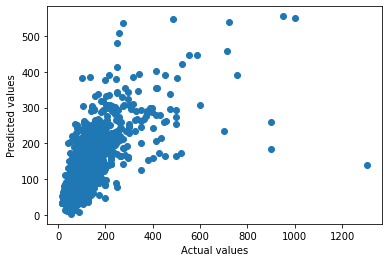

In [109]:
## Prices prediction
y_train_preds1 = lm_model1.predict(X_train1)
print("The r-squared score for the model on the training data is {} on {} values. The RMSE was {}".format(r2_score(y_train1, y_train_preds1), len(y_train1), mean_squared_error(y_train1, y_train_preds1)))
y_test_preds1 = lm_model1.predict(X_test1) 
print("The r-squared score for the model on the test data is {} on {} values.  The RMSE was {}".format(r2_score(y_test1, y_test_preds1), len(y_test1), mean_squared_error(y_test1, y_test_preds1)))
plt.scatter(y_test1, y_test_preds1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig('im15.png', dpi=300, bbox_inches= 'tight' )

The r-squared score for the model on the training data is 0.6681480229552379 on 2618 values. The RMSE was 0.2887700534759358
The r-squared score for the model on the test data is 0.6347445236010685 on 1122 values.  The RMSE was 0.2611408199643494


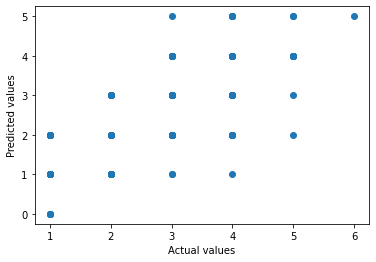

In [110]:
## Number of bedrooms prediction
y_train_preds2 = np.round(lm_model2.predict(X_train2))
print("The r-squared score for the model on the training data is {} on {} values. The RMSE was {}".format(r2_score(y_train2, y_train_preds2), len(y_train2), mean_squared_error(y_train2, y_train_preds2)))
y_test_preds2 = np.round(lm_model2.predict(X_test2))
print("The r-squared score for the model on the test data is {} on {} values.  The RMSE was {}".format(r2_score(y_test2, y_test_preds2), len(y_test2), mean_squared_error(y_test2, y_test_preds2)))
plt.scatter(y_test2, y_test_preds2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig('im16.png', dpi=300, bbox_inches= 'tight' )